<a href="https://colab.research.google.com/github/LucasParreirasDS/Projects/blob/main/QuintoAndar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 1 - Instituto INFNET
Regressão em base de dados da empresa 5° Andar

In [266]:
# Importando bibliotecas a serem usadas
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Importando bibliotecas para criação do modelo
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

In [136]:
# Montando drive para ler o dataset
drive.mount('/content/drive/')
path = '/content/drive/MyDrive/Datasets/'
file_name = 'quinto_andar.csv'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [137]:
# Carregando dataset
file_path = path + file_name
df_og = pd.read_csv(file_path)
df_og

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,https://www.quintoandar.com.br/imovel/89332996...,Liberdade,R$ 1.900,R$ 424,R$ 5,R$ 25,R$ 38,R$ 2.392,57 m²,1 quarto,1 banheiro,1 vaga,18º andar,Aceita pet,Sem mobília,Metrô próx.
1,https://www.quintoandar.com.br/imovel/89334069...,Santa Cecília,R$ 1.190,R$ 460,R$ 0,R$ 16,R$ 23,R$ 1.689,56 m²,1 quarto,1 banheiro,Sem vaga,11º andar,Aceita pet,Mobiliado,Metrô próx.
2,https://www.quintoandar.com.br/imovel/89333859...,Aclimação,R$ 2.330,R$ 450,R$ 5,R$ 30,R$ 46,R$ 2.861,48 m²,1 quarto,1 banheiro,1 vaga,10º andar,Aceita pet,Sem mobília,Metrô próx.
3,https://www.quintoandar.com.br/imovel/89337065...,Liberdade,R$ 1.850,R$ 418,R$ 6,R$ 24,R$ 37,R$ 2.335,44 m²,1 quarto,1 banheiro,1 vaga,3º andar,Aceita pet,Mobiliado,Metrô próx.
4,https://www.quintoandar.com.br/imovel/89337700...,Vila Guilherme,R$ 2.200,R$ 392,R$ 10,R$ 28,R$ 44,R$ 2.674,62 m²,2 quartos,2 banheiros,1 vaga,8º andar,Aceita pet,Sem mobília,Não próx.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,https://www.quintoandar.com.br/imovel/89282425...,Aclimação,R$ 2.200,R$ 0,R$ 72,R$ 37,R$ 44,R$ 2.353,90 m²,2 quartos,1 banheiro,Sem vaga,-,Aceita pet,Sem mobília,Metrô próx.
2773,https://www.quintoandar.com.br/imovel/89336040...,Santa Cecília,R$ 1.120,R$ 280,R$ 0,R$ 15,R$ 22,R$ 1.437,32 m²,1 quarto,1 banheiro,Sem vaga,7º andar,Aceita pet,Sem mobília,Metrô próx.
2774,https://www.quintoandar.com.br/imovel/89292613...,Belém,R$ 1.350,R$ 281,R$ 0,R$ 18,R$ 27,R$ 1.676,32 m²,1 quarto,1 banheiro,Sem vaga,8º andar,Aceita pet,Sem mobília,Não próx.
2775,https://www.quintoandar.com.br/imovel/89336592...,Aclimação,R$ 1.100,R$ 308,R$ 16,R$ 14,R$ 22,R$ 1.460,30 m²,1 quarto,1 banheiro,Sem vaga,7º andar,Aceita pet,Sem mobília,Metrô próx.


In [138]:
# TESTE PARA FINAL DO CÓDIGO
# (np.exp(Y)-1)

In [139]:
# Vamos resetar o index para criar uma coluna 'index' e garantir a ordem do dataset quando fizermos as transformações abaixo
df_og = df_og.reset_index()

In [140]:
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2777 entries, 0 to 2776
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            2777 non-null   int64 
 1   url              2777 non-null   object
 2   bairro           2777 non-null   object
 3   aluguel          2777 non-null   object
 4   condominio       2777 non-null   object
 5   iptu             2777 non-null   object
 6   seguro_incendio  2777 non-null   object
 7   taxa_serviço     2777 non-null   object
 8   total            2777 non-null   object
 9   metragem         2777 non-null   object
 10  quarto           2777 non-null   object
 11  banheiro         2777 non-null   object
 12  vaga_carro       2777 non-null   object
 13  andar            2777 non-null   object
 14  aceita_pet       2777 non-null   object
 15  mobilia          2777 non-null   object
 16  metro_prox       2777 non-null   object
dtypes: int64(1), object(16)
memory us

## Vamos criar uma coluna e separar os bairros por Regiões
Para isso, será feito um _web scraping_ de uma lista do site G1.
<br><br>Obs.: 
Professores alertaram que retirar informações de uma notícia pode ser perigoso, visto que saem do ar com mais frequência.<br>Além disso, o site da Globo também não é o ideal para fazer _web scraping_, por isso o processo aqui foi um pocuo "forçado" para características muito específicas da página.
 

In [141]:
# Importando bibliotecas para faaer o webscrapping
import requests
from bs4 import BeautifulSoup

In [142]:
# Retirando os dados do site da Globo e armazenando todo o conteúdo
response = requests.get('https://g1.globo.com/sao-paulo/noticia/2013/11/veja-distribuicao-oficial-dos-bairros-nas-cinco-regioes-da-cidade.html').content

soup = BeautifulSoup(response, 'html.parser')
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
        "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html dir="ltr" itemscope="" itemtype="http://schema.org/" lang="pt-br" xml:lang="pt-br" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta content="text/html;charset=utf-8" http-equiv="Content-Type"/><title>G1 - Veja a distribuição oficial dos bairros nas cinco regiões da cidade - notícias em São Paulo</title><meta content="text/html;charset=utf-8" http-equiv="Content-Type"/><meta content="G1 - São Paulo" name="editoria"/><meta content="Nov. 18, 2013, 1:13 p.m." name="dtnoticia"/><meta content="Veja a distribuição oficial dos bairros nas cinco regiões da cidade" name="title"/><meta content="Por lei, a cidade é dividida em regiões: Norte, Sul, Leste, Oeste e Centro.
Veja lista com os bairros de cada região. 
" name="description"/><meta content="notícias, notícia, São Paulo" name="keywords"/><meta content="Veja a distribuição of

Encontro a parte da página que quero retirar as informações e pego a id da div para acessar e armazenar numa variável

In [143]:
# Isolando a parte da página que contém os dados
bloco = soup.find('div', id='materia-letra')
bloco

<div class="materia-conteudo entry-content clearfix" id="materia-letra"><html><body><div><p>
	A divisão oficial do território da cidade de São Paulo foi criada por lei para orientar as ações da administração municipal e é separada em cinco regiões geográficas – Norte, Sul, Leste, Oeste e Centro.</p><p><strong>Centro </strong></p><p>
	Sé Bela Vista<br/>
	Bom Retiro<br/>
	Cambuci<br/>
	Consolação<br/>
	Liberdade<br/>
	República<br/>
	Santa Cecília<br/>
	Sé</p><p><strong>Leste </strong></p><p>
	Aricanduva<br/>
	Carrão<br/>
	Vila Formosa<br/>
	Cidade Tiradentes<br/>
	Ermelino Matarazzo<br/>
	Ponte Rasa<br/>
	Guaianases<br/>
	Lajeado<br/>
	Itaim Paulista<br/>
	Vila Curuçá<br/>
	Itaquera<br/>
	Cidade Líder<br/>
	José Bonifácio<br/>
	Parque do Carmo<br/>
	Mooca Água Rasa<br/>
	Belém<br/>
	Brás<br/>
	Moóca<br/>
	Pari<br/>
	Tatuapé<br/>
	Penha<br/>
	Artur Alvim<br/>
	Cangaíba<br/>
	Penha<br/>
	Vila Matilde<br/>
	São Mateus<br/>
	São Rafael<br/>
	São Miguel <br/>
	Jardim Helena<br/>
	Vila Jacuí<

- Os itens que pretendo extrair estão divididos entre '< p >' da seguinte forma:
  - Primeiro item é uma frase que não contém informação que desejo;
  - A partir daí, o bloco fica em uma sequência de nome da região e lista de bairros pertencentes a tal região
  - O nome das regiões também aparecem em negrito (entre < strong >)

In [144]:
# Criando uma lista separando por <p> tudo que está dentro da variável bloco
all = []
for x in bloco.find_all('p'):
  all.append(x)
  
all

[<p>
 	A divisão oficial do território da cidade de São Paulo foi criada por lei para orientar as ações da administração municipal e é separada em cinco regiões geográficas – Norte, Sul, Leste, Oeste e Centro.</p>,
 <p><strong>Centro </strong></p>,
 <p>
 	Sé Bela Vista<br/>
 	Bom Retiro<br/>
 	Cambuci<br/>
 	Consolação<br/>
 	Liberdade<br/>
 	República<br/>
 	Santa Cecília<br/>
 	Sé</p>,
 <p><strong>Leste </strong></p>,
 <p>
 	Aricanduva<br/>
 	Carrão<br/>
 	Vila Formosa<br/>
 	Cidade Tiradentes<br/>
 	Ermelino Matarazzo<br/>
 	Ponte Rasa<br/>
 	Guaianases<br/>
 	Lajeado<br/>
 	Itaim Paulista<br/>
 	Vila Curuçá<br/>
 	Itaquera<br/>
 	Cidade Líder<br/>
 	José Bonifácio<br/>
 	Parque do Carmo<br/>
 	Mooca Água Rasa<br/>
 	Belém<br/>
 	Brás<br/>
 	Moóca<br/>
 	Pari<br/>
 	Tatuapé<br/>
 	Penha<br/>
 	Artur Alvim<br/>
 	Cangaíba<br/>
 	Penha<br/>
 	Vila Matilde<br/>
 	São Mateus<br/>
 	São Rafael<br/>
 	São Miguel <br/>
 	Jardim Helena<br/>
 	Vila Jacuí<br/>
 	Sapopemba<br/>
 	Vila Prudente

In [145]:
# Criando duas listas para receber os bairros e as regioes
b = [] # bairros
r = [] # regioes
c=0 # contador

# Adicionando nas listas os respectivos valores
for item in all:
  if c%2 == 0: # Os valores de índice par são os bairros (menos o 0, que vai ser excluído depois)
    b.append(item.text)
  else:
    r.append(item.text.strip())  # As regiões estão nos indíces ímpares
  c += 1

In [146]:
# Verificando se a lista das regiões já está certa
r

['Centro', 'Leste', 'Norte', 'Oeste', 'Sul']

In [147]:
# Retirando o primeiro item da lista dos bairros, pois era um parágrafo e não continha nenhum valor
b.pop(0)
b

['\n\tSé Bela Vista\n\tBom Retiro\n\tCambuci\n\tConsolação\n\tLiberdade\n\tRepública\n\tSanta Cecília\n\tSé',
 '\n\tAricanduva\n\tCarrão\n\tVila Formosa\n\tCidade Tiradentes\n\tErmelino Matarazzo\n\tPonte Rasa\n\tGuaianases\n\tLajeado\n\tItaim Paulista\n\tVila Curuçá\n\tItaquera\n\tCidade Líder\n\tJosé Bonifácio\n\tParque do Carmo\n\tMooca Água Rasa\n\tBelém\n\tBrás\n\tMoóca\n\tPari\n\tTatuapé\n\tPenha\n\tArtur Alvim\n\tCangaíba\n\tPenha\n\tVila Matilde\n\tSão Mateus\n\tSão Rafael\n\tSão Miguel\xa0\n\tJardim Helena\n\tVila Jacuí\n\tSapopemba\n\tVila Prudente\n\tSão Lucas',
 '\n\tCasa Verde\n\tCachoeirinha\n\tLimão\n\tBrasilândia\n\t\xa0Freguesia do Ó\n\tJaçanã\n\tTremembé\n\tPerus\n\tAnhanguera\n\tPirituba\n\tJaraguá\n\tSão Domingos\n\tSantana\n\tTucuruvi\n\tMandaqui\n\tVila Maria\n\tVila Guilherme\n\tVila Medeiros',
 '\n\tButantã\n\tMorumbi\n\tRaposo Tavares\n\tRio Pequeno\n\tVila Sônia\n\tLapa\n\tBarra Funda\n\tJaguara\n\tJaguaré\n\tPerdizes\n\tVila Leopoldina\n\tPinheiros\n\tAlto de

In [148]:
# Os valores estão separados por '\n\t'. Vamos fazer um split nessa string
b2 = []
for x in b:
  b2.append(x.split('\n\t'))

# O resultado é uma lista de listas
## O primeiro valor de cada lista é um espaço vazio (''). Vamos retirar todos.
for y in b2:
  y.pop(0)

b2

[['Sé Bela Vista',
  'Bom Retiro',
  'Cambuci',
  'Consolação',
  'Liberdade',
  'República',
  'Santa Cecília',
  'Sé'],
 ['Aricanduva',
  'Carrão',
  'Vila Formosa',
  'Cidade Tiradentes',
  'Ermelino Matarazzo',
  'Ponte Rasa',
  'Guaianases',
  'Lajeado',
  'Itaim Paulista',
  'Vila Curuçá',
  'Itaquera',
  'Cidade Líder',
  'José Bonifácio',
  'Parque do Carmo',
  'Mooca Água Rasa',
  'Belém',
  'Brás',
  'Moóca',
  'Pari',
  'Tatuapé',
  'Penha',
  'Artur Alvim',
  'Cangaíba',
  'Penha',
  'Vila Matilde',
  'São Mateus',
  'São Rafael',
  'São Miguel\xa0',
  'Jardim Helena',
  'Vila Jacuí',
  'Sapopemba',
  'Vila Prudente',
  'São Lucas'],
 ['Casa Verde',
  'Cachoeirinha',
  'Limão',
  'Brasilândia',
  '\xa0Freguesia do Ó',
  'Jaçanã',
  'Tremembé',
  'Perus',
  'Anhanguera',
  'Pirituba',
  'Jaraguá',
  'São Domingos',
  'Santana',
  'Tucuruvi',
  'Mandaqui',
  'Vila Maria',
  'Vila Guilherme',
  'Vila Medeiros'],
 ['Butantã',
  'Morumbi',
  'Raposo Tavares',
  'Rio Pequeno',
  

In [149]:
# Aplicando uma técnica de flatten list, para que todos os valores sejam armazenados em uma lista só
bairros = [item for sublist in b2 for item in sublist]
bairros

['Sé Bela Vista',
 'Bom Retiro',
 'Cambuci',
 'Consolação',
 'Liberdade',
 'República',
 'Santa Cecília',
 'Sé',
 'Aricanduva',
 'Carrão',
 'Vila Formosa',
 'Cidade Tiradentes',
 'Ermelino Matarazzo',
 'Ponte Rasa',
 'Guaianases',
 'Lajeado',
 'Itaim Paulista',
 'Vila Curuçá',
 'Itaquera',
 'Cidade Líder',
 'José Bonifácio',
 'Parque do Carmo',
 'Mooca Água Rasa',
 'Belém',
 'Brás',
 'Moóca',
 'Pari',
 'Tatuapé',
 'Penha',
 'Artur Alvim',
 'Cangaíba',
 'Penha',
 'Vila Matilde',
 'São Mateus',
 'São Rafael',
 'São Miguel\xa0',
 'Jardim Helena',
 'Vila Jacuí',
 'Sapopemba',
 'Vila Prudente',
 'São Lucas',
 'Casa Verde',
 'Cachoeirinha',
 'Limão',
 'Brasilândia',
 '\xa0Freguesia do Ó',
 'Jaçanã',
 'Tremembé',
 'Perus',
 'Anhanguera',
 'Pirituba',
 'Jaraguá',
 'São Domingos',
 'Santana',
 'Tucuruvi',
 'Mandaqui',
 'Vila Maria',
 'Vila Guilherme',
 'Vila Medeiros',
 'Butantã',
 'Morumbi',
 'Raposo Tavares',
 'Rio Pequeno',
 'Vila Sônia',
 'Lapa',
 'Barra Funda',
 'Jaguara',
 'Jaguaré',
 'Pe

In [150]:
# Será criado um dataframe com 2 colunas: o nome do bairro e o nome da região
## Para isso, vamos criar uma lista que tenha o mesmo tamanho da lista de bairros, respeitando a proporção das regiões 
regioes = []
c=0 # contador indice
for x in b2:
  for y in range(len(x)):
    regioes.append(r[c])
  c += 1

In [151]:
# Criando o dataframe citado na célula de cima e renomeando suas colunas
df_reg = pd.DataFrame(data=[regioes, bairros]).T
df_reg = df_reg.rename({0: 'regiao', 1: 'bairro'}, axis=1)

Agora vamos ver se os dados obtidos da internet precisam de algum tratamento

In [152]:
df_reg[df_reg['bairro'] == 'Pinheiros'] # Valor repetido

,regiao,bairro
70,Oeste,Pinheiros
74,Oeste,Pinheiros


In [153]:
df_reg.drop(74, inplace=True) # Retirando valor repetido
df_reg.loc[df_reg['bairro'] == 'Sé Bela Vista', 'bairro'] = 'Bela Vista' # Primeiro valor está errado. Nome do bairro é apenas Bela Vista

In [154]:
# Adicionando a coluna para regiões no dataset, usando como base os valores do dataset criado
df = df_og.merge(df_reg, left_on='bairro', right_on='bairro', how='left').sort_values('index') # coluna index que foi criada sendo usada para manter a ordem original
df

,index,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,regiao
0,0,https://www.quintoandar.com.br/imovel/89332996...,Liberdade,R$ 1.900,R$ 424,R$ 5,R$ 25,R$ 38,R$ 2.392,57 m²,1 quarto,1 banheiro,1 vaga,18º andar,Aceita pet,Sem mobília,Metrô próx.,Centro
1,1,https://www.quintoandar.com.br/imovel/89334069...,Santa Cecília,R$ 1.190,R$ 460,R$ 0,R$ 16,R$ 23,R$ 1.689,56 m²,1 quarto,1 banheiro,Sem vaga,11º andar,Aceita pet,Mobiliado,Metrô próx.,Centro
2,2,https://www.quintoandar.com.br/imovel/89333859...,Aclimação,R$ 2.330,R$ 450,R$ 5,R$ 30,R$ 46,R$ 2.861,48 m²,1 quarto,1 banheiro,1 vaga,10º andar,Aceita pet,Sem mobília,Metrô próx.,NaN
3,3,https://www.quintoandar.com.br/imovel/89337065...,Liberdade,R$ 1.850,R$ 418,R$ 6,R$ 24,R$ 37,R$ 2.335,44 m²,1 quarto,1 banheiro,1 vaga,3º andar,Aceita pet,Mobiliado,Metrô próx.,Centro
4,4,https://www.quintoandar.com.br/imovel/89337700...,Vila Guilherme,R$ 2.200,R$ 392,R$ 10,R$ 28,R$ 44,R$ 2.674,62 m²,2 quartos,2 banheiros,1 vaga,8º andar,Aceita pet,Sem mobília,Não próx.,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,2772,https://www.quintoandar.com.br/imovel/89282425...,Aclimação,R$ 2.200,R$ 0,R$ 72,R$ 37,R$ 44,R$ 2.353,90 m²,2 quartos,1 banheiro,Sem vaga,-,Aceita pet,Sem mobília,Metrô próx.,NaN
2773,2773,https://www.quintoandar.com.br/imovel/89336040...,Santa Cecília,R$ 1.120,R$ 280,R$ 0,R$ 15,R$ 22,R$ 1.437,32 m²,1 quarto,1 banheiro,Sem vaga,7º andar,Aceita pet,Sem mobília,Metrô próx.,Centro
2774,2774,https://www.quintoandar.com.br/imovel/89292613...,Belém,R$ 1.350,R$ 281,R$ 0,R$ 18,R$ 27,R$ 1.676,32 m²,1 quarto,1 banheiro,Sem vaga,8º andar,Aceita pet,Sem mobília,Não próx.,Leste
2775,2775,https://www.quintoandar.com.br/imovel/89336592...,Aclimação,R$ 1.100,R$ 308,R$ 16,R$ 14,R$ 22,R$ 1.460,30 m²,1 quarto,1 banheiro,Sem vaga,7º andar,Aceita pet,Sem mobília,Metrô próx.,NaN


In [155]:
# Vendo quais registros ficaram com nulo na coluna da região
## Os bairros que receberam nulos, não estão no site do G1 ou estão com digitação diferente
df.loc[df['regiao'].isnull()]['bairro'].value_counts()

Mooca                  134
Aclimação               97
Centro                  94
Paraíso                 76
Vila Olímpia            37
Higienópolis            33
Vila Nova Conceição     20
Vila Pompéia            16
Sumaré                  13
Vila Clementino         12
Canindé                  9
Vila Maria               8
Água Branca              5
Jardim América           2
Pacaembu                 1
Name: bairro, dtype: int64

Todos esses bairros ficaram sem região após a coleta na internet.<br>Vou adicionar a região manualmente, pesquisando na internet qual a zona os bairros pertencem.

In [156]:
# Completando as regioes faltantes

df.loc[df['bairro'] == 'Mooca', 'regiao'] = 'Leste' # Mooca em df_reg está com acento. O bairro pertence a região Leste.
df.loc[df['bairro'] == 'Aclimação', 'regiao'] = 'Centro' # Aclimação não está presente em df_reg. O bairro pertence a região Centro
df.loc[df['bairro'] == 'Centro', 'regiao'] = 'Centro' # Centro não está presente em df_reg. O bairro pertence a região Centro
df.loc[df['bairro'] == 'Paraíso', 'regiao'] = 'Sul' # Paraíso não está presente em df_reg. O bairro pertence a região Sul
df.loc[df['bairro'] == 'Vila Olímpia', 'regiao'] = 'Sul' # Vila Olímpia não está presente em df_reg. O bairro pertence a região Sul
df.loc[df['bairro'] == 'Higienópolis', 'regiao'] = 'Centro' # Higienópolis não está presente em df_reg. O bairro pertence a região Centro
df.loc[df['bairro'] == 'Vila Nova Conceição', 'regiao'] = 'Sul' # Vila Nova Conceição não está presente em df_reg. O bairro pertence a região Sul
df.loc[df['bairro'] == 'Vila Pompéia', 'regiao'] = 'Oeste' # Vila Pompeia não está presente em df_reg. O bairro pertence a região Oeste
df.loc[df['bairro'] == 'Sumaré', 'regiao'] = 'Oeste' # Sumaré não está presente em df_reg. O bairro pertence a região Oeste
df.loc[df['bairro'] == 'Vila Clementino', 'regiao'] = 'Sul' # Vila Clementino não está presente em df_reg. O bairro pertence a região Sul
df.loc[df['bairro'] == 'Canindé', 'regiao'] = 'Centro' # Canindé não está presente em df_reg. O bairro pertence a região Centro
df.loc[df['bairro'] == 'Vila Maria ', 'regiao'] = str('Norte') # Vila Maria não está presente em df_reg. O bairro pertence a região Norte
df.loc[df['bairro'] == 'Água Branca', 'regiao'] = 'Oeste' # Água Branca não está presente em df_reg. O bairro pertence a região Oeste
df.loc[df['bairro'] == 'Jardim América', 'regiao'] = 'Oeste' # Jardim América não está presente em df_reg. O bairro pertence a região Oeste
df.loc[df['bairro'] == 'Pacaembu', 'regiao'] = 'Oeste' # Pacaembu não está presente em df_reg. O bairro pertence a região Oeste

In [157]:
df.loc[df['regiao'].isnull()]['bairro'].value_counts()

Series([], Name: bairro, dtype: int64)

In [158]:
# Dropando coluna index
df.drop('index', axis=1, inplace=True)
df.head()

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,regiao
0,https://www.quintoandar.com.br/imovel/89332996...,Liberdade,R$ 1.900,R$ 424,R$ 5,R$ 25,R$ 38,R$ 2.392,57 m²,1 quarto,1 banheiro,1 vaga,18º andar,Aceita pet,Sem mobília,Metrô próx.,Centro
1,https://www.quintoandar.com.br/imovel/89334069...,Santa Cecília,R$ 1.190,R$ 460,R$ 0,R$ 16,R$ 23,R$ 1.689,56 m²,1 quarto,1 banheiro,Sem vaga,11º andar,Aceita pet,Mobiliado,Metrô próx.,Centro
2,https://www.quintoandar.com.br/imovel/89333859...,Aclimação,R$ 2.330,R$ 450,R$ 5,R$ 30,R$ 46,R$ 2.861,48 m²,1 quarto,1 banheiro,1 vaga,10º andar,Aceita pet,Sem mobília,Metrô próx.,Centro
3,https://www.quintoandar.com.br/imovel/89337065...,Liberdade,R$ 1.850,R$ 418,R$ 6,R$ 24,R$ 37,R$ 2.335,44 m²,1 quarto,1 banheiro,1 vaga,3º andar,Aceita pet,Mobiliado,Metrô próx.,Centro
4,https://www.quintoandar.com.br/imovel/89337700...,Vila Guilherme,R$ 2.200,R$ 392,R$ 10,R$ 28,R$ 44,R$ 2.674,62 m²,2 quartos,2 banheiros,1 vaga,8º andar,Aceita pet,Sem mobília,Não próx.,Norte


## Transformação de dados

### Vamos conhecer as nossas features e separar em numéricas e categoricas.


In [159]:
df.columns

Index(['url', 'bairro', 'aluguel', 'condominio', 'iptu', 'seguro_incendio',
       'taxa_serviço', 'total', 'metragem', 'quarto', 'banheiro', 'vaga_carro',
       'andar', 'aceita_pet', 'mobilia', 'metro_prox', 'regiao'],
      dtype='object')

* url = Link para página do imóvel - categórico
* bairro = Bairro do imóvel - categórico
* aluguel = Valor do aluguel - numérico
* condominio = Valor do condomínio - numérico
* iptu = Valor do IPTU - numérico
* seguro_incendio = Valor do seguro incendio - nnumérico
* taxa_serviço = Valor da taxa de serviço - numérico
* total = Total a ser pago - numérico
* metragem = Área do imóvel - numérico
* quarto = Número de quartos - numérico
* banheiro = Número de banheiros - numérico
* vaga_carro = Número de vagas de garagem - numérico
* andar = Em qual andar fica o apartamento - numérico
* aceita_pet = Se o imóvel permit animal de estimação - categórico (bool)
* mobilia = Se o imóvel é alugado mobiliado - categórico (bool)
* metro_prox = Se o imóvel possui metrõ próximo - categórico (bool)
* regiao = Qual zona da cidade de SP o imóvel se localiza - categórico

Vamos separar os  numéricos e colocar os categóricos (bool) junto, pois serão representados por 0 e 1.

In [160]:
# Criando um dataframe para tratar os valores numéricos
num = ['aluguel', 'condominio', 'iptu', 'seguro_incendio',
       'taxa_serviço', 'total', 'metragem', 'quarto', 'banheiro', 'vaga_carro',
       'andar', 'aceita_pet', 'mobilia', 'metro_prox']
numeric = df[num]


In [161]:
numeric.head()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,R$ 1.900,R$ 424,R$ 5,R$ 25,R$ 38,R$ 2.392,57 m²,1 quarto,1 banheiro,1 vaga,18º andar,Aceita pet,Sem mobília,Metrô próx.
1,R$ 1.190,R$ 460,R$ 0,R$ 16,R$ 23,R$ 1.689,56 m²,1 quarto,1 banheiro,Sem vaga,11º andar,Aceita pet,Mobiliado,Metrô próx.
2,R$ 2.330,R$ 450,R$ 5,R$ 30,R$ 46,R$ 2.861,48 m²,1 quarto,1 banheiro,1 vaga,10º andar,Aceita pet,Sem mobília,Metrô próx.
3,R$ 1.850,R$ 418,R$ 6,R$ 24,R$ 37,R$ 2.335,44 m²,1 quarto,1 banheiro,1 vaga,3º andar,Aceita pet,Mobiliado,Metrô próx.
4,R$ 2.200,R$ 392,R$ 10,R$ 28,R$ 44,R$ 2.674,62 m²,2 quartos,2 banheiros,1 vaga,8º andar,Aceita pet,Sem mobília,Não próx.


Vamos começar a tratar esses dados, pois todos estão em formato de _str_<br>


#### Precisaremos retirar 'R$ ' e '.' para as colunas que representam um valor monetário, depois transformamos para int

In [162]:
# Retirando os 'R$ ' e os '.' para as células que representam valores monetários
numeric = numeric.applymap(lambda x: x.replace('R$ ', ''))
numeric = numeric.applymap(lambda x: x.replace('.', ''))
numeric.head()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,1900,424,5,25,38,2392,57 m²,1 quarto,1 banheiro,1 vaga,18º andar,Aceita pet,Sem mobília,Metrô próx
1,1190,460,0,16,23,1689,56 m²,1 quarto,1 banheiro,Sem vaga,11º andar,Aceita pet,Mobiliado,Metrô próx
2,2330,450,5,30,46,2861,48 m²,1 quarto,1 banheiro,1 vaga,10º andar,Aceita pet,Sem mobília,Metrô próx
3,1850,418,6,24,37,2335,44 m²,1 quarto,1 banheiro,1 vaga,3º andar,Aceita pet,Mobiliado,Metrô próx
4,2200,392,10,28,44,2674,62 m²,2 quartos,2 banheiros,1 vaga,8º andar,Aceita pet,Sem mobília,Não próx


Transformando essas colunas para int

In [163]:
def transf(col):
  numeric[col] = numeric[col].astype(str).astype(int)
  return numeric[col].dtypes

In [164]:
# Temos registros em 'condominio' como 'Sem info'. Precisamos tratar antes de transformar
# Pela coluna 'total' percebe-se que os valores de 'Sem info' = 0
numeric.loc[numeric['condominio'] == 'Sem info', 'condominio'] = 0

In [165]:
# Temos registros em 'condominio' como 'Incluso'. Precisamos tratar antes de transformar
numeric.loc[numeric['condominio'] == 'Incluso', 'condominio'] = 0

In [166]:
# Temos registros como 'Incluso' em 'iptu'. Precisamos tratar
numeric.loc[numeric['iptu'] == 'Incluso', 'iptu'] = 0

In [167]:
# Transformando as colunas monetárias
money = ['aluguel',	'condominio',	'iptu',	'seguro_incendio',	'taxa_serviço',	'total']
for x in money:
  transf(x)

In [168]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2777 entries, 0 to 2776
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   aluguel          2777 non-null   int64 
 1   condominio       2777 non-null   int64 
 2   iptu             2777 non-null   int64 
 3   seguro_incendio  2777 non-null   int64 
 4   taxa_serviço     2777 non-null   int64 
 5   total            2777 non-null   int64 
 6   metragem         2777 non-null   object
 7   quarto           2777 non-null   object
 8   banheiro         2777 non-null   object
 9   vaga_carro       2777 non-null   object
 10  andar            2777 non-null   object
 11  aceita_pet       2777 non-null   object
 12  mobilia          2777 non-null   object
 13  metro_prox       2777 non-null   object
dtypes: int64(6), object(8)
memory usage: 325.4+ KB


#### Precisaremos tirar o 'm2' da metragem e transformá-lo para int

In [169]:
# Retirando os ' m2' para que os que separam os milhares não sejam entendidos como casa decimal
numeric['metragem'] = numeric['metragem'].apply(lambda x: x.replace(' m²', ''))

In [170]:
# Temos um dado errado no dataframe, vamos analisar
df[df['metragem'] == 'Vila Olímpia, São Paulo']

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,regiao
1562,https://www.quintoandar.com.br/imovel/89335300...,Vila Olímpia,R$ 2.750,R$ 700,R$ 303,R$ 35,R$ 55,R$ 3.843,"Vila Olímpia, São Paulo","Vila Olímpia, São Paulo","Itaim Bibi, São Paulo","Jardim Paulista, São Paulo","Vila Nova Conceição, São Paulo",90 m²,2 quartos,1 banheiro,Sul


Podemos ver que a linha tem vários erros, apesar de conseguirmos saber a metragem do ap, não teremos informações das últimas 3 colunas.<br>Vamos excluir a linha de id 1562

In [171]:
df.drop(numeric.loc[numeric['metragem']== 'Vila Olímpia, São Paulo'].index, inplace=True)
df.reset_index()

,index,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,regiao
0,0,https://www.quintoandar.com.br/imovel/89332996...,Liberdade,R$ 1.900,R$ 424,R$ 5,R$ 25,R$ 38,R$ 2.392,57 m²,1 quarto,1 banheiro,1 vaga,18º andar,Aceita pet,Sem mobília,Metrô próx.,Centro
1,1,https://www.quintoandar.com.br/imovel/89334069...,Santa Cecília,R$ 1.190,R$ 460,R$ 0,R$ 16,R$ 23,R$ 1.689,56 m²,1 quarto,1 banheiro,Sem vaga,11º andar,Aceita pet,Mobiliado,Metrô próx.,Centro
2,2,https://www.quintoandar.com.br/imovel/89333859...,Aclimação,R$ 2.330,R$ 450,R$ 5,R$ 30,R$ 46,R$ 2.861,48 m²,1 quarto,1 banheiro,1 vaga,10º andar,Aceita pet,Sem mobília,Metrô próx.,Centro
3,3,https://www.quintoandar.com.br/imovel/89337065...,Liberdade,R$ 1.850,R$ 418,R$ 6,R$ 24,R$ 37,R$ 2.335,44 m²,1 quarto,1 banheiro,1 vaga,3º andar,Aceita pet,Mobiliado,Metrô próx.,Centro
4,4,https://www.quintoandar.com.br/imovel/89337700...,Vila Guilherme,R$ 2.200,R$ 392,R$ 10,R$ 28,R$ 44,R$ 2.674,62 m²,2 quartos,2 banheiros,1 vaga,8º andar,Aceita pet,Sem mobília,Não próx.,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,2772,https://www.quintoandar.com.br/imovel/89282425...,Aclimação,R$ 2.200,R$ 0,R$ 72,R$ 37,R$ 44,R$ 2.353,90 m²,2 quartos,1 banheiro,Sem vaga,-,Aceita pet,Sem mobília,Metrô próx.,Centro
2772,2773,https://www.quintoandar.com.br/imovel/89336040...,Santa Cecília,R$ 1.120,R$ 280,R$ 0,R$ 15,R$ 22,R$ 1.437,32 m²,1 quarto,1 banheiro,Sem vaga,7º andar,Aceita pet,Sem mobília,Metrô próx.,Centro
2773,2774,https://www.quintoandar.com.br/imovel/89292613...,Belém,R$ 1.350,R$ 281,R$ 0,R$ 18,R$ 27,R$ 1.676,32 m²,1 quarto,1 banheiro,Sem vaga,8º andar,Aceita pet,Sem mobília,Não próx.,Leste
2774,2775,https://www.quintoandar.com.br/imovel/89336592...,Aclimação,R$ 1.100,R$ 308,R$ 16,R$ 14,R$ 22,R$ 1.460,30 m²,1 quarto,1 banheiro,Sem vaga,7º andar,Aceita pet,Sem mobília,Metrô próx.,Centro


In [172]:
numeric.drop(numeric.loc[numeric['metragem']== 'Vila Olímpia, São Paulo'].index, inplace=True)
transf('metragem')

dtype('int64')

In [173]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2776 entries, 0 to 2776
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   aluguel          2776 non-null   int64 
 1   condominio       2776 non-null   int64 
 2   iptu             2776 non-null   int64 
 3   seguro_incendio  2776 non-null   int64 
 4   taxa_serviço     2776 non-null   int64 
 5   total            2776 non-null   int64 
 6   metragem         2776 non-null   int64 
 7   quarto           2776 non-null   object
 8   banheiro         2776 non-null   object
 9   vaga_carro       2776 non-null   object
 10  andar            2776 non-null   object
 11  aceita_pet       2776 non-null   object
 12  mobilia          2776 non-null   object
 13  metro_prox       2776 non-null   object
dtypes: int64(7), object(7)
memory usage: 325.3+ KB


#### Precisamos guardar apenas a informação do número de quartos e de banheiros
Em ambas as colunas, essa informação está no 1° caractere


In [174]:
numeric.quarto.value_counts()

1 quarto     1522
2 quartos     894
3 quartos     322
4 quartos      32
5 quartos       4
0 quarto        2
Name: quarto, dtype: int64

In [175]:
# Retirando ' quarto(s)'
numeric['quarto'] = numeric['quarto'].apply(lambda x: x[0])
numeric['banheiro'] = numeric['banheiro'].apply(lambda x: x[0])

In [176]:
transf('quarto')

dtype('int64')

In [177]:
transf('banheiro')

dtype('int64')

In [178]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2776 entries, 0 to 2776
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   aluguel          2776 non-null   int64 
 1   condominio       2776 non-null   int64 
 2   iptu             2776 non-null   int64 
 3   seguro_incendio  2776 non-null   int64 
 4   taxa_serviço     2776 non-null   int64 
 5   total            2776 non-null   int64 
 6   metragem         2776 non-null   int64 
 7   quarto           2776 non-null   int64 
 8   banheiro         2776 non-null   int64 
 9   vaga_carro       2776 non-null   object
 10  andar            2776 non-null   object
 11  aceita_pet       2776 non-null   object
 12  mobilia          2776 non-null   object
 13  metro_prox       2776 non-null   object
dtypes: int64(9), object(5)
memory usage: 325.3+ KB


#### Precisaremos retirar o ' vagas' da coluna 'vaga_carro' e substituir 'Sem vaga' por 0
Essa informação está no 1° caractere

In [179]:
numeric.vaga_carro.value_counts()

Sem vaga    1287
1 vaga      1273
2 vagas      186
3 vagas       24
4 vagas        4
6 vagas        1
5 vagas        1
Name: vaga_carro, dtype: int64

In [180]:
numeric['vaga_carro'] = numeric.vaga_carro.replace('Sem vaga', '0')

In [181]:
numeric['vaga_carro'] = numeric['vaga_carro'].apply(lambda x: x[0])

In [182]:
transf('vaga_carro')

dtype('int64')

In [183]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2776 entries, 0 to 2776
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   aluguel          2776 non-null   int64 
 1   condominio       2776 non-null   int64 
 2   iptu             2776 non-null   int64 
 3   seguro_incendio  2776 non-null   int64 
 4   taxa_serviço     2776 non-null   int64 
 5   total            2776 non-null   int64 
 6   metragem         2776 non-null   int64 
 7   quarto           2776 non-null   int64 
 8   banheiro         2776 non-null   int64 
 9   vaga_carro       2776 non-null   int64 
 10  andar            2776 non-null   object
 11  aceita_pet       2776 non-null   object
 12  mobilia          2776 non-null   object
 13  metro_prox       2776 non-null   object
dtypes: int64(10), object(4)
memory usage: 325.3+ KB


#### Precisamos retirar '° andar' da coluna 'andar'

In [184]:
numeric['andar'] = numeric['andar'].apply(lambda x: x.replace('º andar', ''))

In [185]:
numeric['andar'] = numeric['andar'].apply(lambda x: x.replace('-', '0'))

In [186]:
numeric.andar.value_counts()

1     349
2     292
0     258
3     228
4     195
6     184
5     178
7     169
8     164
9     138
11    109
10    103
12     99
14     67
13     63
15     49
16     36
18     32
17     17
21     10
19      9
20      7
23      5
24      5
26      3
22      2
72      1
43      1
51      1
25      1
27      1
Name: andar, dtype: int64

In [187]:
transf('andar')

dtype('int64')

In [188]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2776 entries, 0 to 2776
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   aluguel          2776 non-null   int64 
 1   condominio       2776 non-null   int64 
 2   iptu             2776 non-null   int64 
 3   seguro_incendio  2776 non-null   int64 
 4   taxa_serviço     2776 non-null   int64 
 5   total            2776 non-null   int64 
 6   metragem         2776 non-null   int64 
 7   quarto           2776 non-null   int64 
 8   banheiro         2776 non-null   int64 
 9   vaga_carro       2776 non-null   int64 
 10  andar            2776 non-null   int64 
 11  aceita_pet       2776 non-null   object
 12  mobilia          2776 non-null   object
 13  metro_prox       2776 non-null   object
dtypes: int64(11), object(3)
memory usage: 325.3+ KB


#### Agora vamos tratar nossas features categóricas
0: negativo<br>
1: positivo

In [189]:
numeric.aceita_pet.value_counts()

Aceita pet    2150
Não aceita     626
Name: aceita_pet, dtype: int64

In [190]:
numeric['aceita_pet'] = numeric.aceita_pet.map({'Aceita pet': 1, 'Não aceita': 0})

In [191]:
numeric.mobilia.value_counts()

Sem mobília    2215
Mobiliado       561
Name: mobilia, dtype: int64

In [192]:
numeric['mobilia'] = numeric.mobilia.map({'Mobiliado': 1, 'Sem mobília': 0})

In [193]:
numeric.metro_prox.value_counts()

Metrô próx    2038
Não próx       738
Name: metro_prox, dtype: int64

In [194]:
numeric['metro_prox'] = numeric.metro_prox.map({'Metrô próx': 1, 'Não próx': 0})

In [195]:
numeric.head()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,1900,424,5,25,38,2392,57,1,1,1,18,1,0,1
1,1190,460,0,16,23,1689,56,1,1,0,11,1,1,1
2,2330,450,5,30,46,2861,48,1,1,1,10,1,0,1
3,1850,418,6,24,37,2335,44,1,1,1,3,1,1,1
4,2200,392,10,28,44,2674,62,2,2,1,8,1,0,0


In [196]:
numeric.aluguel.sort_values(ascending=False).head(10)

235     11250
2307    11250
1583    10870
762     10500
1403     9700
2725     9700
255      9690
2313     9690
1631     9660
387      9200
Name: aluguel, dtype: int64

In [197]:
df_og.iloc[2313]

index                                                           2313
url                https://www.quintoandar.com.br/imovel/89335438...
bairro                                               Jardim Paulista
aluguel                                                     R$ 9.690
condominio                                                  R$ 1.900
iptu                                                        R$ 1.000
seguro_incendio                                               R$ 123
taxa_serviço                                                  R$ 193
total                                                      R$ 12.910
metragem                                                      151 m²
quarto                                                     3 quartos
banheiro                                                 5 banheiros
vaga_carro                                                   3 vagas
andar                                                       5º andar
aceita_pet                        

### Agora vamos trabalhar com o novo dataset

In [198]:
# Concatenando as colunas bairro e regiao no dataset das variáveis numéricas
df = pd.concat([df[['bairro', 'regiao']], numeric], axis=1) # já vou deixar 'url' de fora, pois não agregará em nada

In [199]:
# Transformando a coluna regiao em variáveis dummy e adicionando-as no dataset
dummies = pd.get_dummies(df.regiao, prefix='Reg')
df = pd.concat([df, dummies], axis=1)

In [200]:
df.head()

,bairro,regiao,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,...,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Reg_Centro,Reg_Leste,Reg_Norte,Reg_Oeste,Reg_Sul
0,Liberdade,Centro,1900,424,5,25,38,2392,57,1,...,1,18,1,0,1,1,0,0,0,0
1,Santa Cecília,Centro,1190,460,0,16,23,1689,56,1,...,0,11,1,1,1,1,0,0,0,0
2,Aclimação,Centro,2330,450,5,30,46,2861,48,1,...,1,10,1,0,1,1,0,0,0,0
3,Liberdade,Centro,1850,418,6,24,37,2335,44,1,...,1,3,1,1,1,1,0,0,0,0
4,Vila Guilherme,Norte,2200,392,10,28,44,2674,62,2,...,1,8,1,0,0,0,0,1,0,0


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2776 entries, 0 to 2776
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bairro           2776 non-null   object
 1   regiao           2776 non-null   object
 2   aluguel          2776 non-null   int64 
 3   condominio       2776 non-null   int64 
 4   iptu             2776 non-null   int64 
 5   seguro_incendio  2776 non-null   int64 
 6   taxa_serviço     2776 non-null   int64 
 7   total            2776 non-null   int64 
 8   metragem         2776 non-null   int64 
 9   quarto           2776 non-null   int64 
 10  banheiro         2776 non-null   int64 
 11  vaga_carro       2776 non-null   int64 
 12  andar            2776 non-null   int64 
 13  aceita_pet       2776 non-null   int64 
 14  mobilia          2776 non-null   int64 
 15  metro_prox       2776 non-null   int64 
 16  Reg_Centro       2776 non-null   uint8 
 17  Reg_Leste        2776 non-null   

In [202]:
df.describe()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Reg_Centro,Reg_Leste,Reg_Norte,Reg_Oeste,Reg_Sul
count,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.00000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000
mean,2279.220101,596.737752,282.695605,29.956772,45.381484,3235.21938,63.781700,1.593660,1.398775,0.628242,5.970461,0.774496,0.202089,0.734150,0.483069,0.091138,0.030259,0.261888,0.133646
std,1329.465882,430.577702,9409.374078,17.676684,26.618472,9585.98305,38.637804,0.749209,0.686434,0.674462,5.225633,0.417989,0.401631,0.441864,0.499803,0.287858,0.171331,0.439741,0.340332
min,500.000000,0.000000,0.000000,7.000000,10.000000,697.00000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1400.000000,330.000000,0.000000,18.750000,28.000000,1877.50000,40.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1950.000000,520.000000,54.000000,26.000000,39.000000,2617.50000,52.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2745.750000,800.000000,140.000000,36.000000,54.000000,3758.00000,76.000000,2.000000,2.000000,1.000000,9.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,11250.000000,3300.000000,495800.000000,187.000000,225.000000,499600.00000,587.000000,5.000000,7.000000,6.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [203]:
# Claramente temos um erro na coluna 'iptu', com um registro de R$495800
## Vamos conferir o valor no dataset original
df[df.iptu == 495800]

,bairro,regiao,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,...,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Reg_Centro,Reg_Leste,Reg_Norte,Reg_Oeste,Reg_Sul
1709,Santa Cecília,Centro,3600,0,495800,60,72,499600,150,4,...,0,0,1,0,1,1,0,0,0,0


In [204]:
df.iloc[1708] 

bairro             Santa Cecília
regiao                    Centro
aluguel                     3600
condominio                     0
iptu                      495800
seguro_incendio               60
taxa_serviço                  72
total                     499600
metragem                     150
quarto                         4
banheiro                       3
vaga_carro                     0
andar                          0
aceita_pet                     1
mobilia                        0
metro_prox                     1
Reg_Centro                     1
Reg_Leste                      0
Reg_Norte                      0
Reg_Oeste                      0
Reg_Sul                        0
Name: 1709, dtype: object

Creio que foi um erro de digitação<br> O valor que me parece mais correto é de R$495,80, arredondaremos para 496 e recalcularemos o valor da coluna 'total'

In [205]:
df.loc[df.iptu > 40000, 'iptu'] = 496

In [206]:
# Recalculando total
df.loc[df.total > 40000, 'total'] = df[['aluguel', 'condominio', 'iptu', 'seguro_incendio', 'taxa_serviço']].iloc[1708].sum()

In [207]:
df.describe()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Reg_Centro,Reg_Leste,Reg_Norte,Reg_Oeste,Reg_Sul
count,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000
mean,2279.220101,596.737752,104.271974,29.956772,45.381484,3056.771254,63.781700,1.593660,1.398775,0.628242,5.970461,0.774496,0.202089,0.734150,0.483069,0.091138,0.030259,0.261888,0.133646
std,1329.465882,430.577702,150.149571,17.676684,26.618472,1753.484466,38.637804,0.749209,0.686434,0.674462,5.225633,0.417989,0.401631,0.441864,0.499803,0.287858,0.171331,0.439741,0.340332
min,500.000000,0.000000,0.000000,7.000000,10.000000,697.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1400.000000,330.000000,0.000000,18.750000,28.000000,1877.500000,40.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1950.000000,520.000000,54.000000,26.000000,39.000000,2617.500000,52.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2745.750000,800.000000,140.000000,36.000000,54.000000,3758.000000,76.000000,2.000000,2.000000,1.000000,9.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,11250.000000,3300.000000,1917.000000,187.000000,225.000000,13810.000000,587.000000,5.000000,7.000000,6.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Análise exploratória

### Variável _target_ (total)

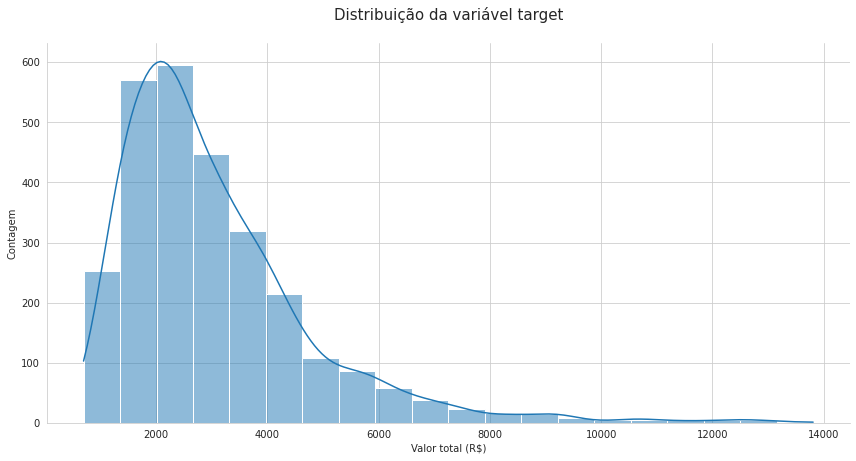

In [208]:
# Vamos ver a distribuição do total em 20 bins iguais
ax = sns.displot(x='total', data=df, kde=True, bins=20, height=6, aspect=2)
plt.title('Distribuição da variável target\n', fontsize=15)
plt.xlabel('Valor total (R$)')
plt.ylabel('Contagem');


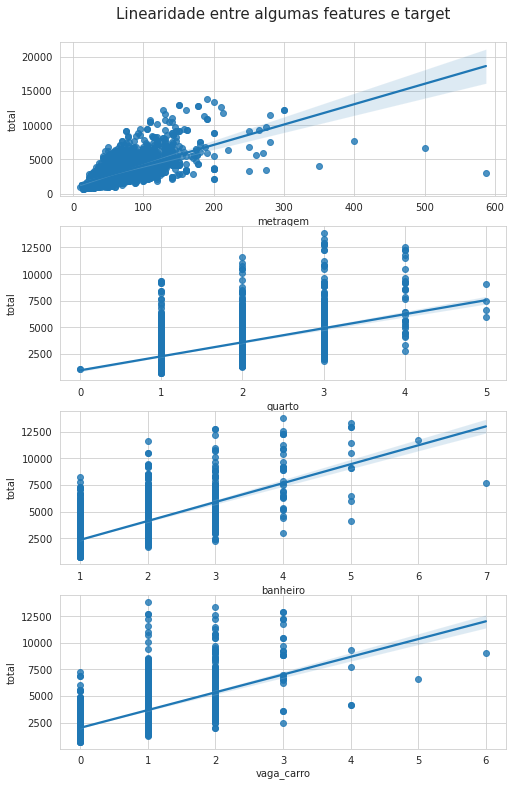

In [209]:
cols = ['metragem', 'quarto', 'banheiro', 'vaga_carro']
# Vamos plotar o grafico de linearidade entre essas 4 features e nosso target

fig, ax = plt.subplots(4, 1, figsize=(8,13))
for c in range(4):
  sns.regplot(x=df[cols[c]], y=df.total, ax=ax[c])
plt.tight_layout

ax[0].set_title('Linearidade entre algumas features e target\n', fontsize=15);

Todas as quatro parecem ter correlação positiva com a variável target

''

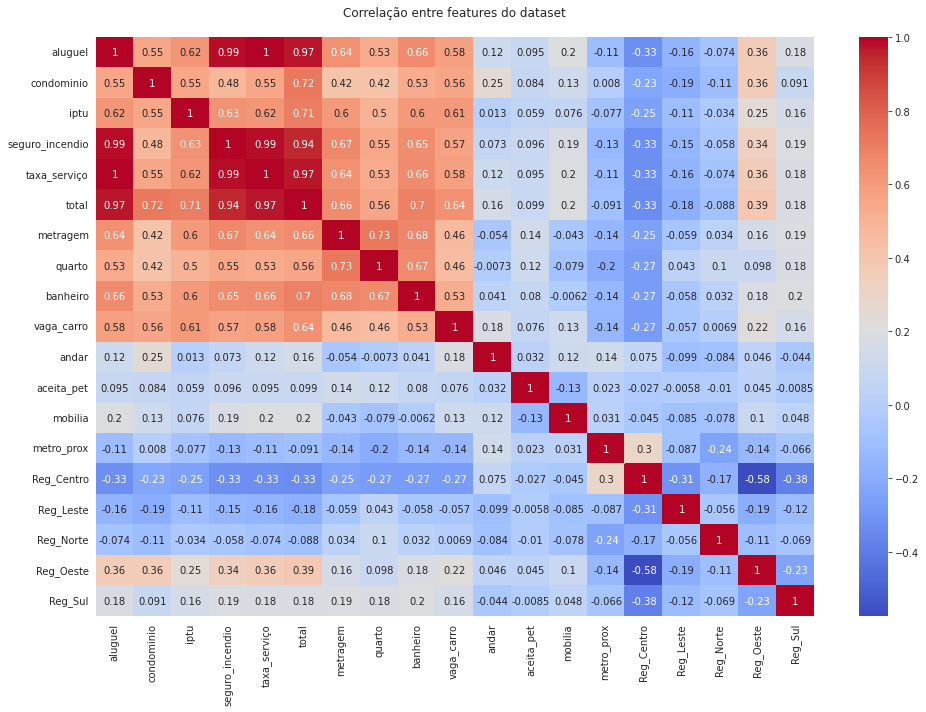

In [210]:
plt.figure(figsize=(14,10))
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
ax.set_title('Correlação entre features do dataset\n')
plt.tight_layout()
;

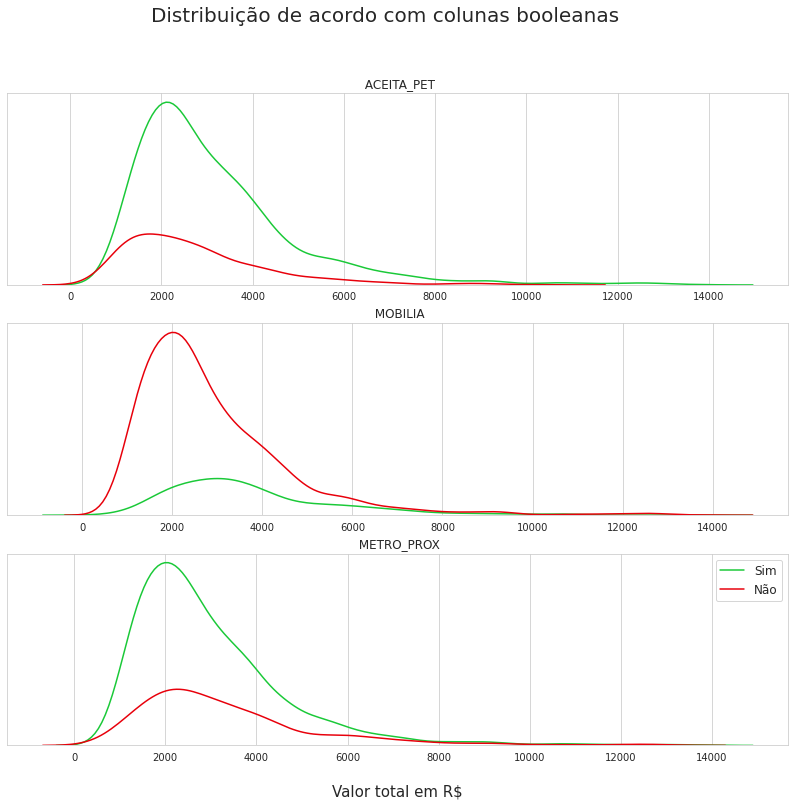

In [211]:
palette = [sns.color_palette('bright')[3], sns.color_palette('bright')[2]]

cols=['aceita_pet', 'mobilia', 'metro_prox']
fig, ax = plt.subplots(3, 1, figsize=(14,12))
for c in range(3):
    sns.kdeplot(x=df['total'], hue=df[cols[c]], ax=ax[c], legend=False, palette=palette)
    ax[c].set_title(' \n\n '+cols[c].upper())
    ax[c].set_xlabel('')
    ax[c].set_ylabel('')
    ax[c].set_yticks([])
ax[2].set_xlabel('\nValor total em R$', fontsize=15)
ax[2].legend(labels=['Sim', 'Não' ], fontsize=12)
fig.suptitle('Distribuição de acordo com colunas booleanas', fontsize=20)
fig.tight_layout;


''

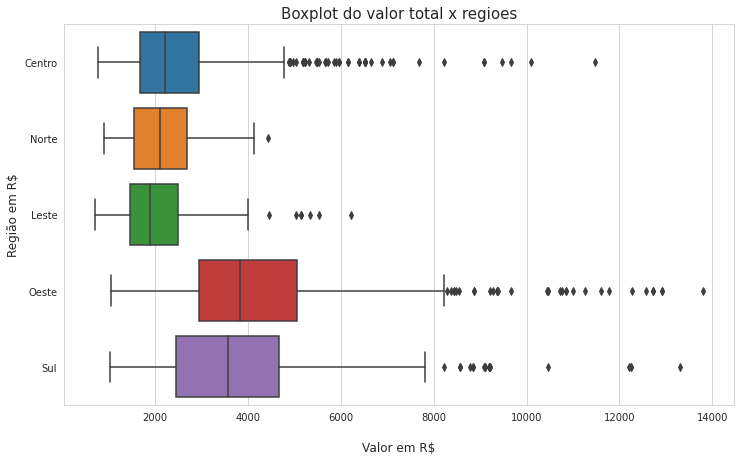

In [213]:
plt.figure(figsize=(12, 7))
ax =  sns.boxplot(y='regiao', x='total', data=df, orient='h')
ax.set_title('Boxplot do valor total x regioes',  fontsize=15)
ax.set_xlabel('\nValor em R$', fontsize=12)
ax.set_ylabel('Região em R$', fontsize=12)
;

## Distribuição e normalização de dados


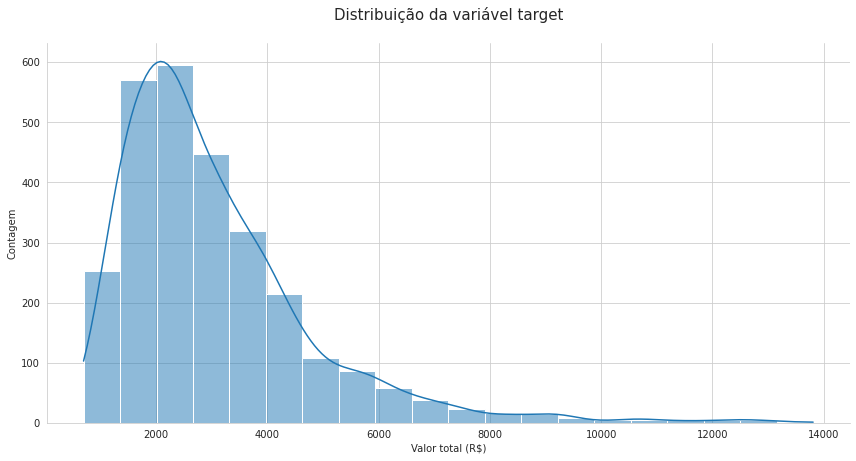

In [214]:
# Variável target
ax = sns.displot(x='total', data=df, kde=True, bins=20, height=6, aspect=2)
plt.title('Distribuição da variável target\n', fontsize=15)
plt.xlabel('Valor total (R$)')
plt.ylabel('Contagem');

In [215]:
df['total'] = np.log(df['total']+1)

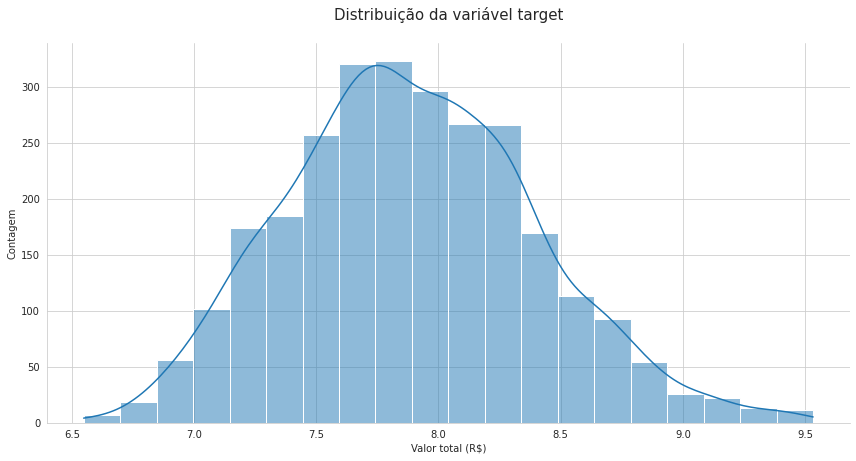

In [216]:
ax = sns.displot(x='total', data=df, kde=True, bins=20, height=6, aspect=2)
plt.title('Distribuição da variável target\n', fontsize=15)
plt.xlabel('Valor total (R$)')
plt.ylabel('Contagem');

Podemos ver que os dados não mantem uma distribuição normal, ela possui uma assimetria positiva (pico desviado para a esquerda e 'cauda grande' na direita. Para resolver, vamos aplicar uma transformação logarítimica na coluna

Vamos verificar para outras variáveis

In [217]:
cols = ['metragem','quarto','banheiro','vaga_carro']

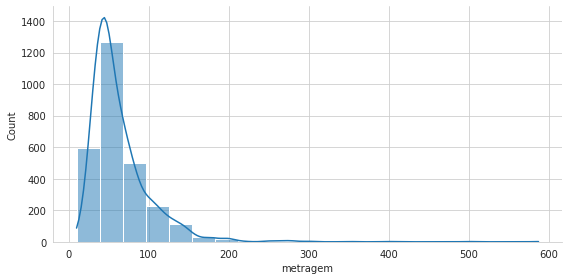

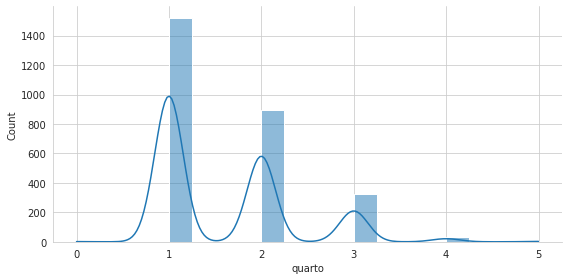

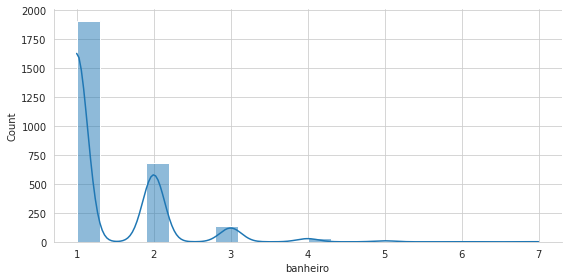

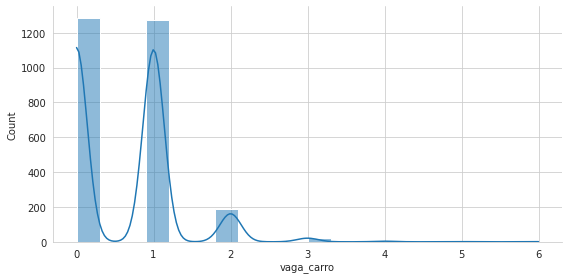

In [218]:
for c in range(4):
  sns.displot(x=df[cols[c]], data=df, kde=True, bins=20, height=4, aspect=2, )

In [219]:
# Vamos transformar esses dados tambem
df[cols] = df[cols].applymap(lambda x: np.log(x+1))
df

,bairro,regiao,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,...,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Reg_Centro,Reg_Leste,Reg_Norte,Reg_Oeste,Reg_Sul
0,Liberdade,Centro,1900,424,5,25,38,7.780303,4.060443,0.693147,...,0.693147,18,1,0,1,1,0,0,0,0
1,Santa Cecília,Centro,1190,460,0,16,23,7.432484,4.043051,0.693147,...,0.000000,11,1,1,1,1,0,0,0,0
2,Aclimação,Centro,2330,450,5,30,46,7.959276,3.891820,0.693147,...,0.693147,10,1,0,1,1,0,0,0,0
3,Liberdade,Centro,1850,418,6,24,37,7.756195,3.806662,0.693147,...,0.693147,3,1,1,1,1,0,0,0,0
4,Vila Guilherme,Norte,2200,392,10,28,44,7.891705,4.143135,1.098612,...,0.693147,8,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,Aclimação,Centro,2200,0,72,37,44,7.763871,4.510860,1.098612,...,0.000000,0,1,0,1,1,0,0,0,0
2773,Santa Cecília,Centro,1120,280,0,15,22,7.271009,3.496508,0.693147,...,0.000000,7,1,0,1,1,0,0,0,0
2774,Belém,Leste,1350,281,0,18,27,7.424762,3.496508,0.693147,...,0.000000,8,1,0,0,0,1,0,0,0
2775,Aclimação,Centro,1100,308,16,14,22,7.286876,3.433987,0.693147,...,0.000000,7,1,0,1,1,0,0,0,0


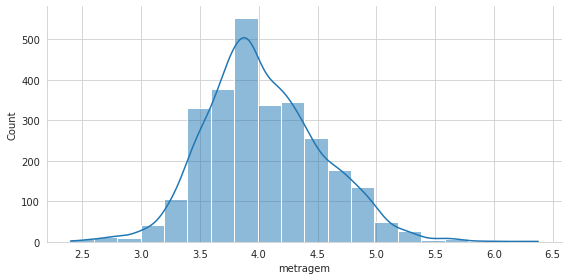

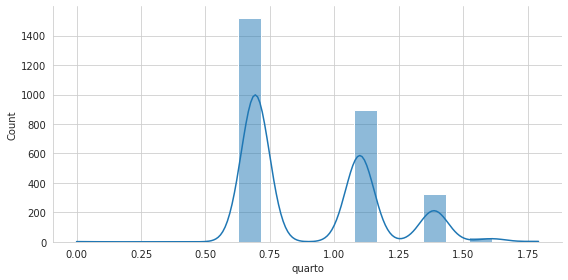

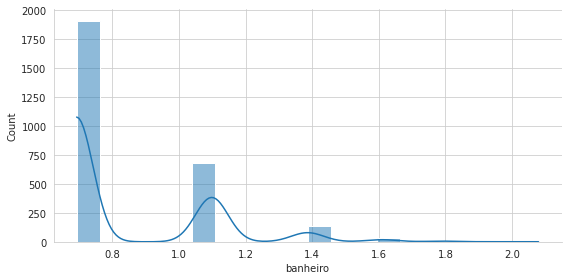

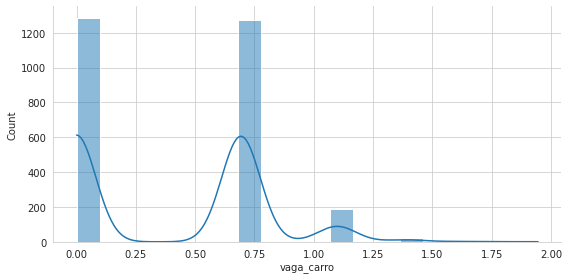

In [220]:
for c in range(4):
  sns.displot(x=df[cols[c]], data=df, kde=True, bins=20, height=4, aspect=2, )

## Vamos começar a testar os diferentes modelos:
- Regressão linear
- Regressão linear múltipla
- Regressão Ridge
- Regressão Lasso

In [221]:
# Agora que vamos para criação dos modelos, vamos retirar as colunas com dtype = string
df.drop(['bairro', 'regiao'], axis=1, inplace=True)
df.head()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Reg_Centro,Reg_Leste,Reg_Norte,Reg_Oeste,Reg_Sul
0,1900,424,5,25,38,7.780303,4.060443,0.693147,0.693147,0.693147,18,1,0,1,1,0,0,0,0
1,1190,460,0,16,23,7.432484,4.043051,0.693147,0.693147,0.000000,11,1,1,1,1,0,0,0,0
2,2330,450,5,30,46,7.959276,3.891820,0.693147,0.693147,0.693147,10,1,0,1,1,0,0,0,0
3,1850,418,6,24,37,7.756195,3.806662,0.693147,0.693147,0.693147,3,1,1,1,1,0,0,0,0
4,2200,392,10,28,44,7.891705,4.143135,1.098612,1.098612,0.693147,8,1,0,0,0,0,1,0,0


In [222]:
# Funções utilizadas para plotar:
## Os erros (r² score e erro medio absoluto)
## Um gráfico comparando a distribuição entre valores reais e preditos
def erros(y_real, Y_pred):
  r2 = r2_score(y_real, Y_pred)
  mae = mean_absolute_error(y_real, Y_pred)

  print('R2: ', r2)
  print('Mean Absolute Error: ', mae)

def plotResult(y_real, Y_pred):
  plt.figure(figsize=(12,7))
  ax1 = sns.distplot(y_real, hist=False, color='b', label='Valor Atual')
  sns.distplot(Y_pred, hist=False, color='r', label='Valor Previsto')
  plt.legend()
  plt.title('Atual x Predito')
  plt.xlabel('Price')
  plt.ylabel('Proportion')
  plt.show()


In [274]:
# ['total', 'metragem', 'quarto', 'banheiro', 'vaga_carro', 'andar', 'aceita_pet', 'mobilia', 'metro_prox', 'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']

# Definindo quais features usar

X = df[['total', 'metragem', 'quarto', 'banheiro', 'vaga_carro', 'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
Y = X.pop('total')

### Regressão Linear Múltipla

In [275]:
df.head()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Reg_Centro,Reg_Leste,Reg_Norte,Reg_Oeste,Reg_Sul
0,1900,424,5,25,38,7.780303,4.060443,0.693147,0.693147,0.693147,18,1,0,1,1,0,0,0,0
1,1190,460,0,16,23,7.432484,4.043051,0.693147,0.693147,0.000000,11,1,1,1,1,0,0,0,0
2,2330,450,5,30,46,7.959276,3.891820,0.693147,0.693147,0.693147,10,1,0,1,1,0,0,0,0
3,1850,418,6,24,37,7.756195,3.806662,0.693147,0.693147,0.693147,3,1,1,1,1,0,0,0,0
4,2200,392,10,28,44,7.891705,4.143135,1.098612,1.098612,0.693147,8,1,0,0,0,0,1,0,0


Vamos dividir o dataset em treino e teste

In [276]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.25)

Padronizando os dados

In [226]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

Agora vamos aplicar o modelo

In [277]:
# Criando o modelo e fitando aos dados
model = LinearRegression()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

In [228]:
# Métricas usadas
erros(np.exp(y_test)-1, np.exp(y_pred)-1)

R2:  0.74210964923814
Mean Absolute Error:  583.1352969195299


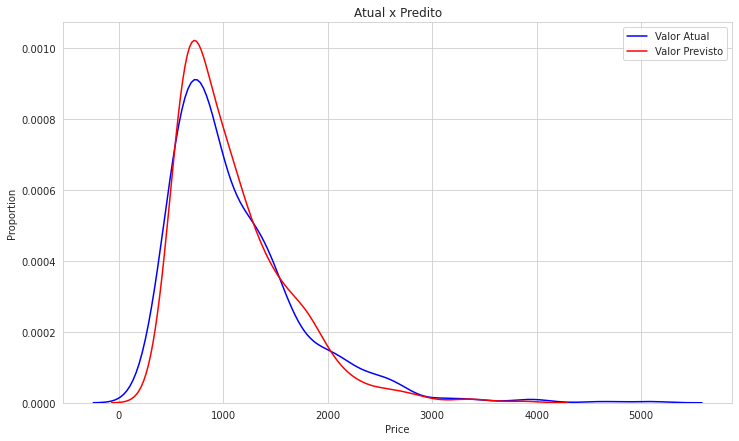

In [230]:
# Grafico comparativo: previsto x real
plotResult(np.exp(y_test-1), np.exp(y_pred-1));

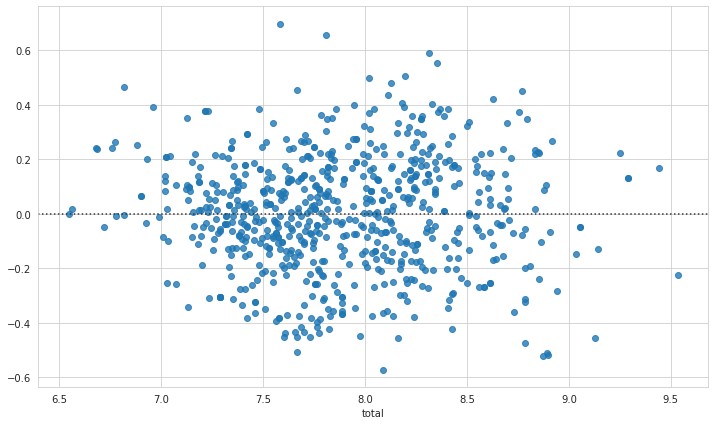

In [231]:
plt.figure(figsize=(12,7))
ax = sns.residplot(y_test, y_pred)

#### Resultados:

* X = df[['total', 'metragem', 'quarto', 'banheiro', 'vaga_carro','andar', 'aceita_pet', 'mobilia', 'metro_prox', 'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
  * ERRO


* X = df[['total', 'metragem', 'quarto', 'banheiro', 'vaga_carro', 'aceita_pet', 'mobilia', 'metro_prox', 'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
  * R2_score: 0,769
  * MAE: 547,15


*  X = df[['total', 'metragem', 'quarto', 'banheiro', 'vaga_carro',  'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
  * R2_score: 0,754
  * MAE: 585,82


* X = df[['total', 'metragem', 'vaga_carro', 'aceita_pet', 'mobilia', 'metro_prox', 'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
  * ERRO




  



### Regressão polinomial

Criando um pipeline para fazer a padronização, tranformação polinomial e aplicar o modelo

In [232]:
from sklearn.pipeline import Pipeline

In [233]:
Input = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]

In [234]:
pipe = Pipeline(Input)

Dividindo o dataset em treino e teste

In [235]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.25)

Aplicando o modelo

In [236]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [237]:
y_pred = pipe.predict(x_test)

Métricas

In [238]:
erros(np.exp(y_test)-1, np.exp(y_pred)-1)

R2:  0.7497415594888168
Mean Absolute Error:  570.2613481415134


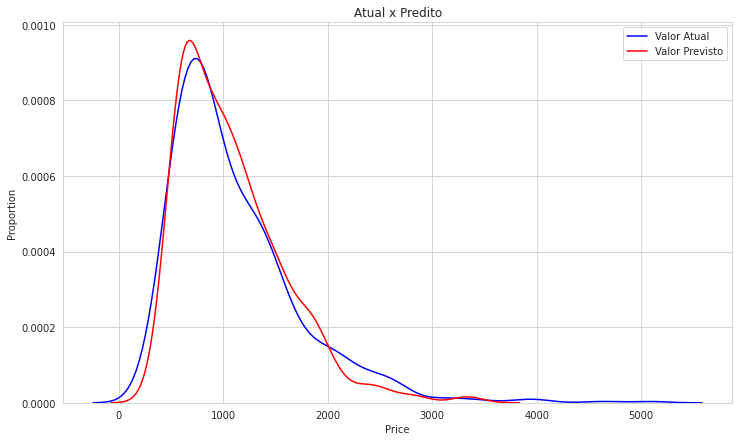

In [239]:
plotResult(np.exp(y_test-1), np.exp(y_pred-1));

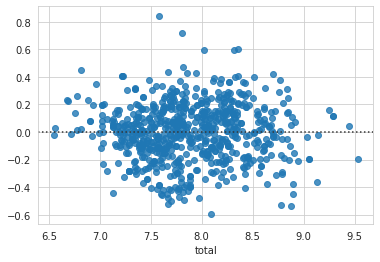

In [240]:
sns.residplot(y_test, y_pred)

#### Resultados:




* X = df[['total', 'metragem', 'quarto', 'banheiro', 'vaga_carro','andar', 'aceita_pet', 'mobilia', 'metro_prox', 'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
  * R2_score: 0,794
  * MAE: 513,77


* X = df[['total', 'metragem', 'quarto', 'banheiro', 'vaga_carro', 'aceita_pet', 'mobilia', 'metro_prox', 'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
  * R2_score: 0,769
  * MAE: 547,15


*  X = df[['total', 'metragem', 'quarto', 'banheiro', 'vaga_carro',  'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
  * R2_score: 0,739
  * MAE: 584,33


* X = df[['total', 'metragem', 'vaga_carro', 'aceita_pet', 'mobilia', 'metro_prox', 'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
  * R2_score: 0,767
  * MAE: 557,08



### Ridge

Vamos dividir o dataset em treino e teste

In [241]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.25)

In [242]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [243]:
pr = PolynomialFeatures(degree=2)

x_train_pr = pr.fit_transform(x_train_scaled)
x_test_pr = pr.fit_transform(x_test_scaled)

In [244]:
rm = Ridge()

Vamos utilizar o GridSearchCV para descobrir melhor valor de alpha

In [245]:
parametros = [{'alpha': [1, 10, 50, 100, 250, 500]}]
gs = GridSearchCV(rm, parametros, cv=5)

gs.fit(x_train_pr, y_train)
gs.best_estimator_

Ridge(alpha=50)

In [246]:
rm = Ridge(alpha=100)
rm.fit(x_train_pr, y_train)

y_pred = rm.predict(x_test_pr)

In [247]:
erros(np.exp(y_test)-1, np.exp(y_pred)-1)

R2:  0.7491176206839325
Mean Absolute Error:  572.0073582844124


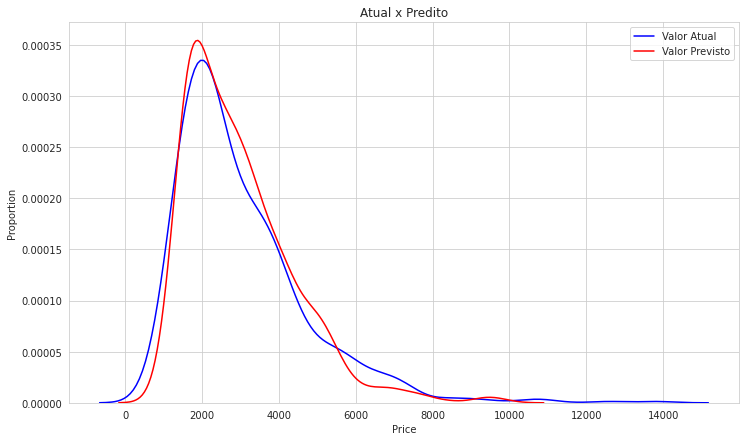

In [248]:
plotResult(np.exp(y_test)+1, np.exp(y_pred)+1);

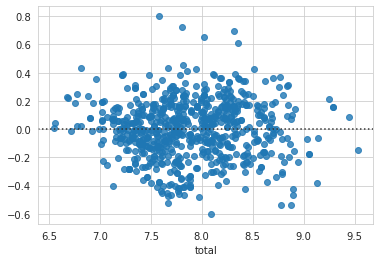

In [249]:
sns.residplot(y_test, y_pred);

#### Resultados:

* X = df[['total', 'metragem', 'quarto', 'banheiro', 'vaga_carro', 'andar', 'aceita_pet', 'mobilia', 'metro_prox', 'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
  * R2_score: 0,802
  * MAE: 512,61


* X = df[['total', 'metragem', 'quarto', 'banheiro', 'vaga_carro', 'aceita_pet', 'mobilia', 'metro_prox', 'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
  * R2_score: 0,788
  * MAE: 528,77


* *  X = df[['total', 'metragem', 'quarto', 'banheiro', 'vaga_carro',  'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
  * r2_SCORE: 0,751
  * MAE: 580,8
  * residplot: existe padrão, mas já deu uma espalhada 


* X = df[['total', 'metragem', 'vaga_carro', 'aceita_pet', 'mobilia', 'metro_prox', 'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
  * R2_score: 0,772
  * MAE: 551,30



### Lasso

In [250]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.25)

In [251]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [252]:
pr = PolynomialFeatures(degree=2)

x_train_pr = pr.fit_transform(x_train_scaled)
x_test_pr = pr.fit_transform(x_test_scaled)

In [253]:
lasso = Lasso()

In [254]:
parametros = [{'alpha': [0.0001, 0.001, 0.1, 0.5, 1]}]
gs = GridSearchCV(lasso, parametros, cv=5)

gs.fit(x_train_pr, y_train)
gs.best_estimator_

Lasso(alpha=0.001)

In [255]:
lasso = Lasso(alpha=0.001)
lasso.fit(x_train_pr, y_train)

y_pred = lasso.predict(x_test_pr)

In [256]:
erros(np.exp(y_test)-1, np.exp(y_pred)-1)

R2:  0.7531373261932853
Mean Absolute Error:  571.0453697689353


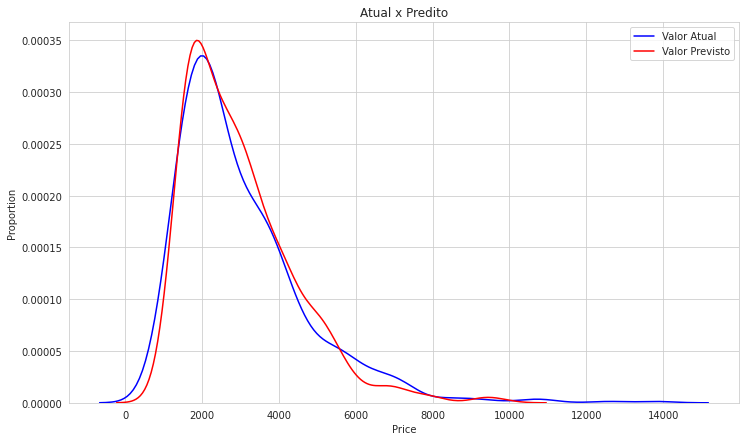

In [257]:
plotResult(np.exp(y_test)+1, np.exp(y_pred)+1);

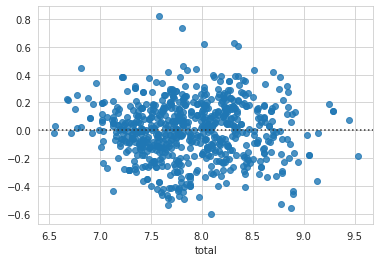

In [258]:
sns.residplot(y_test, y_pred);

#### Resultados


* X = df[['total', 'metragem', 'quarto', 'banheiro', 'vaga_carro','andar', 'aceita_pet', 'mobilia', 'metro_prox', 'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
  * R2_score: 0,802
  * MAE: 513,48


* X = df[['total', 'metragem', 'quarto', 'banheiro', 'vaga_carro', 'aceita_pet', 'mobilia', 'metro_prox', 'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
  * R2_score: 0,791
  * MAE:  529,07

*  X = df[['total', 'metragem', 'quarto', 'banheiro', 'vaga_carro',  'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
  * R2_score: 0,742
  * MAE: 586,60

* X = df[['total', 'metragem', 'vaga_carro', 'aceita_pet', 'mobilia', 'metro_prox', 'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
  * R2_score: 0,772
  * MAE: 552,25

  


### Random Forest Regressor

In [259]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.25)

In [260]:
scaler = StandardScaler()

_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [261]:
parametros = [{'n_estimators': [100, 300, 500, 700]}]
gs = GridSearchCV(RandomForestRegressor(), parametros, cv=5)

gs.fit(x_train_scaled, y_train)
gs.best_estimator_

RandomForestRegressor(n_estimators=700)

In [262]:
rf = RandomForestRegressor(n_estimators=700)
rf.fit(x_train_scaled, y_train)

y_pred = rf.predict(x_test_scaled)

In [263]:
erros(np.exp(y_test)-1, np.exp(y_pred)-1)

R2:  0.7887021991793508
Mean Absolute Error:  530.5487547839778


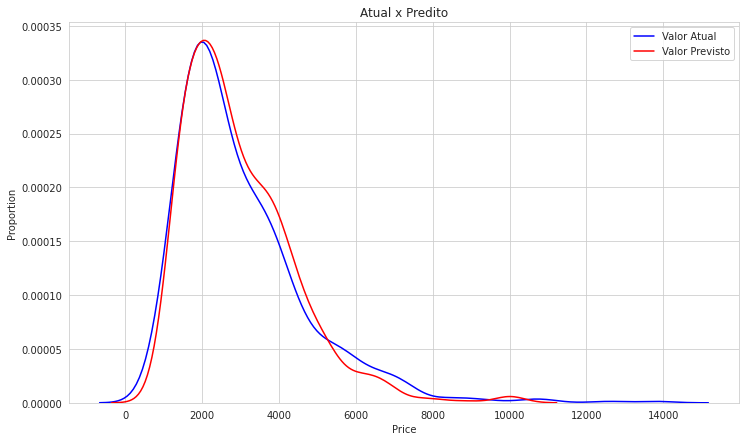

In [264]:
plotResult(np.exp(y_test)-1, np.exp(y_pred)-1);

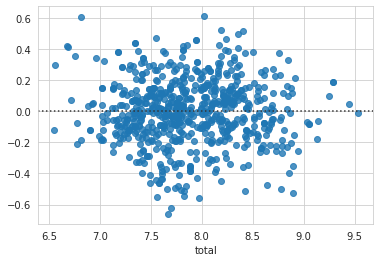

In [265]:
sns.residplot(y_test, y_pred);

#### Resultados


* X = df[['total', 'metragem', 'quarto', 'banheiro', 'vaga_carro','andar', 'aceita_pet', 'mobilia', 'metro_prox', 'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
  * R2_score: 0,831
  * MAE: 468,05


* X = df[['total', 'metragem', 'quarto', 'banheiro', 'vaga_carro', 'aceita_pet', 'mobilia', 'metro_prox', 'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
  * R2_score: 0,804
  * MAE:  517,74


*  X = df[['total', 'metragem', 'quarto', 'banheiro', 'vaga_carro',  'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
  * R2_score: 0,754
  * MAE: 584,3


* X = df[['total', 'metragem', 'vaga_carro', 'aceita_pet', 'mobilia', 'metro_prox', 'Reg_Centro', 'Reg_Leste', 'Reg_Norte', 'Reg_Oeste', 'Reg_Sul']]
  * R2_score: 0,734
  * MAE: 575,49



## Resultado:


A técnica que se saiu melhor em todas as testadas foi a <strong>RandomForestRegressor</strong> , com um _R² score_ de <strong>0,83</strong>. <br>A melhor combinação de features testadas foi com todas as colunas do df, menos a de 'bairros' e 'url' (e região que é tranformada em variáveis _dummy_.<br><br> A segunda melhor combinação também é do <strong>RandomForestRegressor</strong> com outras colunas usadas e _R² score_ de <strong>0,804</strong>, seguido de <strong>Lasso</strong> e <strong>Ridge</strong> empatados com _R² score_ de <strong>0,802</strong>